#Number of organisations the PFDs are sent to

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
deaths = pd.read_csv('death_info_2022-06-23_processed.csv')

In [ ]:
print(deaths.shape)

(4001, 9)


In [ ]:
deaths.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
deaths['this_report_is_being_sent_to'] = deaths['this_report_is_being_sent_to'].str.replace(';', '|')

In [ ]:
deaths_year = pd.read_csv('death_info_2022-06-23_processed_year.csv')

In [ ]:
nan_year = deaths_year[deaths_year['this_report_is_being_sent_to'].isna()]

In [ ]:
year = nan_year.groupby('year').count()

In [ ]:
year.reset_index(inplace = True)

In [ ]:
year = year[['year', 'Unnamed: 0']]
year.rename(columns = {'Unnamed: 0': 'Count'}, inplace = True)

In [ ]:
display(year)

,year,Count
0,2013.0,179
1,2014.0,560
2,2015.0,326
3,2018.0,1
4,2019.0,2
5,2020.0,1


In [ ]:
total_year = deaths_year.groupby(by='year').count()

In [ ]:
total_year.reset_index(inplace = True)
total_year = total_year[['year', 'Unnamed: 0']]
total_year.rename(columns = {'Unnamed: 0': 'Count'}, inplace = True)

In [ ]:
display(total_year)

,year,Count
0,2013.0,180
1,2014.0,568
2,2015.0,492
3,2016.0,479
4,2017.0,444
5,2018.0,418
6,2019.0,528
7,2020.0,311
8,2021.0,433
9,2022.0,145


<BarContainer object of 6 artists>

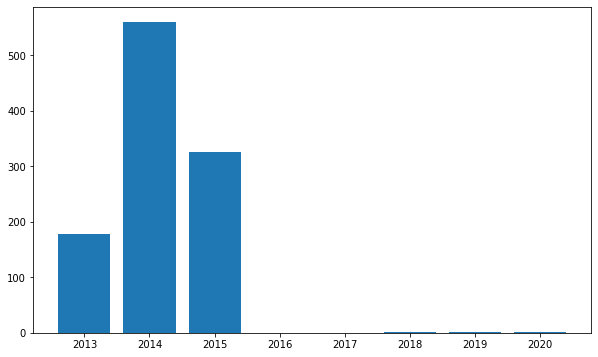

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(year['year'], year['Count'])

In [ ]:
deaths = deaths_year[deaths_year['year']!=2013]
deaths = deaths[deaths['year']!=2014]
deaths = deaths[deaths['year']!=2015]

In [ ]:
deaths.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'year'], inplace = True)

In [ ]:
display(deaths.head())

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...
1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...
2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...
3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...
4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...


#1.1 NAN

In [ ]:
sent_nan = deaths[deaths['this_report_is_being_sent_to'].isna()]

In [ ]:
print(sent_nan.shape)

(4, 8)


1068 - more than 1/4 of the reports are not being sent anywhere

Make the column of sent_count = 0

In [ ]:
sent_nan['sent_count'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#1.2 Not nan

In [ ]:
sent = deaths[deaths['this_report_is_being_sent_to'].notna()]

In [ ]:
print(sent.shape)

(2757, 8)


#1.3 "Various recipients - please see in the report"

In [ ]:
various = sent[sent['this_report_is_being_sent_to'].str.contains("Various recipients")]

In [ ]:
display(various)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
66,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...
157,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...
228,3 November 2021,2021-0362,SJaJMUK,HH Judge Lucraft QC. Recorder of London. Sitti...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...


In [ ]:
various['sent_count'] = np.zeros((3, 1))
various.loc[various['ref']=='2022-0089', 'sent_count'] = 20
various.loc[various['ref']=='2021-0433', 'sent_count'] = 10
various.loc[various['ref']=='2021-0362', 'sent_count'] = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
display(various)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
66,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...,20.0
157,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...,10.0
228,3 November 2021,2021-0362,SJaJMUK,HH Judge Lucraft QC. Recorder of London. Sitti...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...,10.0


In [ ]:
sent = sent.merge(various, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
sent = sent[sent['_merge']=='left_only']
sent.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge'], axis = 1, inplace = True)
sent.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
print(sent.shape)

(2754, 9)


# 1.1.1 Containing |

Assume that the categories are just separated by | and any other punctuations contained between two | is just part of the name

In [ ]:
sent_line = sent[sent['this_report_is_being_sent_to'].str.contains('\|')]
print(sent_line.shape)

(2, 9)


In [ ]:
sent_line['sent_count'] = np.zeros((775, 1))
sent_line['sent_split']=sent_line['this_report_is_being_sent_to'].str.split('|', expand = False)
sent_line['sent_count'] = sent_line['sent_split'].apply(lambda x: len(x))
sent_line.drop(columns = ['sent_split'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
display(sent_line.head())

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
429,21 May 2021,2021-0167,DM,Zak Golombeck,Manchester City,Community health care | Mental Health related ...,EMIS Health | NICE | Royal College of GPs,https://www.judiciary.uk/publications/dyllon-m...,3
571,3 February 2021,2021-0025,CS,Sonia Hayes,Mid Kent and Medway,Hospital Death (Clinical Procedures and medica...,Medway NHS Foundation Trust | Adult Safeguardi...,https://www.judiciary.uk/publications/christop...,2


# 1.1.2 Not |

More complicated

Found by taking sent and subtracting by sent_line

In [ ]:
sent_no_line = sent.merge(sent_line, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
sent_no_line = sent_no_line[sent_no_line['_merge']=='left_only']

In [ ]:
display(sent_no_line.head())
print(sent_no_line.shape)

,date_of_report_x,ref_x,deceased_name_x,coroner_name_x,coroner_area_x,category_x,this_report_is_being_sent_to,url_x,sent_count_x,date_of_report_y,ref_y,deceased_name_y,coroner_name_y,coroner_area_y,category_y,url_y,sent_count_y,_merge
0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


(2752, 18)


Drop and Rename columns

In [ ]:
sent_no_line.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge', 'sent_count_x', 'sent_count_y'], axis = 1, inplace = True)
sent_no_line.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

# Check for &

In [ ]:
sym_and = sent_no_line[sent_no_line['this_report_is_being_sent_to'].str.contains('&')]

In [ ]:
print(sym_and.shape)

(80, 8)


# 1.1.2.2 Containing , but not | or &

In [ ]:
comma = sent_no_line[sent_no_line['this_report_is_being_sent_to'].str.contains(',')]

In [ ]:
display(comma)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
7,18 May 2022,2022-0148,ME,Karen Henderson,Surrey,Community health care | Mental Health related ...,"NHS England, Department of Health, CQC, GMC, S...",https://www.judiciary.uk/publications/matthew-...
8,28 April 2022,2022-0147,SC,Maria Voisin,Avon,Suicide (from 2015) | Mental Health related de...,"Royal College of GPs, British Medical Associat...",https://www.judiciary.uk/publications/susan-ca...
10,15 May 2022,2022-0145,CW,Karen Henderson,Surrey,Child Death (from 2015) |Hospital Death (Clini...,"NHS England, Department of Health, Children’s ...",https://www.judiciary.uk/publications/connor-w...
13,13 May 2022,2022-0142,SB,Adam Hodson,Birmingham and Solihull,Hospital Death (Clinical Procedures and medica...,"Probation Service – Young Adults Central Team,...",https://www.judiciary.uk/publications/spencer-...
32,26 April 2022,2022-0123,AT,Graeme Irvine,East London,Emergency services related deaths (2019 onward...,"Sequence Care Group, London Fire Brigade, Nati...",https://www.judiciary.uk/publications/ashleigh...
...,...,...,...,...,...,...,...,...
2590,22 April 2016,2016 – 0162,MF,R Brittain,London Inner North,Hospital Death (Clinical Procedures and medica...,"Secretary of State, Department of Health",https://www.judiciary.uk/publications/marina-f...
2657,4 March 2016,2016-0090,ER,Crispin Oliver,County Durham and Darlington,Community health care and emergency services r...,Neasham Road Surgery; County Durham and Darlin...,https://www.judiciary.uk/publications/elsie-ra...
2670,29 February 2016,2016- 0078,SG,Lisa Hashmi,Manchester (North),Hospital Death (Clinical Procedures and medica...,"Pennine Care NHS Trust; Rochdale, Heywood and ...",https://www.judiciary.uk/publications/susan-ge...
2678,24 February 2016,2016-0100,MR,Zafar Siddique,Black Country,Hospital Death (Clinical Procedures and medica...,"The Royal Wolverhampton, New Cross Hospital",https://www.judiciary.uk/publications/marie-ro...


In [ ]:
comma = comma.merge(sym_and, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
comma = comma[comma['_merge']=='left_only']
comma.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y', '_merge'], axis = 1, inplace = True)
comma.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
display(comma.head())

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
0,18 May 2022,2022-0148,ME,Karen Henderson,Surrey,Community health care | Mental Health related ...,"NHS England, Department of Health, CQC, GMC, S...",https://www.judiciary.uk/publications/matthew-...
1,28 April 2022,2022-0147,SC,Maria Voisin,Avon,Suicide (from 2015) | Mental Health related de...,"Royal College of GPs, British Medical Associat...",https://www.judiciary.uk/publications/susan-ca...
2,15 May 2022,2022-0145,CW,Karen Henderson,Surrey,Child Death (from 2015) |Hospital Death (Clini...,"NHS England, Department of Health, Children’s ...",https://www.judiciary.uk/publications/connor-w...
3,13 May 2022,2022-0142,SB,Adam Hodson,Birmingham and Solihull,Hospital Death (Clinical Procedures and medica...,"Probation Service – Young Adults Central Team,...",https://www.judiciary.uk/publications/spencer-...
4,26 April 2022,2022-0123,AT,Graeme Irvine,East London,Emergency services related deaths (2019 onward...,"Sequence Care Group, London Fire Brigade, Nati...",https://www.judiciary.uk/publications/ashleigh...


In [ ]:
print(comma.shape)

(203, 8)


# 1.1.2.2.2 Has no "and"

Split straightaway

In [ ]:
comma_no_and = comma[comma['this_report_is_being_sent_to'].str.count(' and ')==0]
print(comma_no_and.shape)

(37, 8)


In [ ]:
comma_no_and['sent_count'] = comma['this_report_is_being_sent_to'].str.count(',') + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
display(comma_no_and)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
38,5 October 2021,2021-0334,CD,Dr Nicholas Shaw,Cumbria,Other related deaths | Community health care,"Adult Safeguarding, Cumbria County Council",https://www.judiciary.uk/publications/charlott...,2
41,4 October 2021,2021-0329,JL,Nigel Meadows,Manchester City,Hospital Death (Clinical Procedures and medica...,"Greater Manchester Mental Health NHS Trust, Pr...",https://www.judiciary.uk/publications/jude-llo...,2
63,2 June 2021,2021-0188,CJ,Bina Patel,Mid Kent and Medway,Care Home Health related deaths,"Avery Healthcare, Elvy Court Nursing Home",https://www.judiciary.uk/publications/catherin...,2
98,11 February 2021,2021-0034,VB,Dr Fiona Wilcox,Inner West London,Hospital Death (Clinical Procedures and medica...,"Acute Mental Health Services, West London NHS ...",https://www.judiciary.uk/publications/valeria-...,2
99,10 February 2021,2021-0033,LG,Mary Hassell,Inner North London,Child Death (from 2015) | Community health care,"Children’s Services, Haringey Council",https://www.judiciary.uk/publications/lily-mai...,2
100,3 February 2021,2021-0027,DM,Professor Fiona Wilcox,Inner West London,"Alcohol, drug and medication related deaths","St John’s College, Oxford University",https://www.judiciary.uk/publications/daniel-m...,2
125,8 June 2020,2020-0126,MH,Penelope Schofield,West Sussex,Care home health related deaths; Other related...,"Pelham House, West Sussex",https://www.judiciary.uk/publications/mildred-...,2
128,3 April 2020,2020-0086,ED,Joanne Lees,Black Country,Care Home Health related deaths; Other related...,"Oak Court House, Wolverhampton City Council",https://www.judiciary.uk/publications/edna-dav...,2
135,31 December 2019,2019-0457,JO,Caroline Sumeray,Isle of Wight,Mental Health related deaths;,National Trust on the Isle of Wight; Public He...,https://www.judiciary.uk/publications/joanna-o...,2
137,16 December 2019,2019-0433,AW,Alison Mutch,Manchester (South),Care Home Health related deaths,"Fernlea Nursing Home, CQC, Stockport CCG",https://www.judiciary.uk/publications/arnold-w...,3


# 1.1.2.1 Not containing , or |

In [ ]:
no_comma = sent_no_line.merge(comma, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
no_comma = no_comma[no_comma['_merge']=='left_only']
no_comma.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge'], axis = 1, inplace = True)
no_comma.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
no_comma = no_comma.merge(sym_and, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
no_comma = no_comma[no_comma['_merge']=='left_only']
no_comma.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge'], axis = 1, inplace = True)
no_comma.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
print(no_comma.shape)

(2469, 8)


# 1.1.2.1.1 " - "

In [ ]:
dash = no_comma[no_comma['this_report_is_being_sent_to'].str.contains(' \– ')]
print(dash.shape)
display(dash)

(16, 8)


,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...
9,13 May 2022,2022-0143,MDaRW,Alan Walsh,Manchester West,Road (Highways Safety) related deaths,Highways Department – Salford City Council,https://www.judiciary.uk/publications/michael-...
17,9 May 2022,2022-0134,MW,John Gittins,North Wales (East & Central),Road (Highways Safety) related deaths |Wales p...,The Occupier and Highways Department – Wrexham...,https://www.judiciary.uk/publications/michael-...
68,14 March 2022,2022-0080,ML,Dr Sarah-Jane Richards,South Wales Central,Wales prevention of future deaths reports (201...,Highways Department – Powys County Council and...,https://www.judiciary.uk/publications/margaret...
113,3 February 2022,2022-0028,HS,Deborah Archer,"Plymouth, Torbay and South Devon",Road (Highways Safety) related deaths,Plymouth Highways – Plymouth City Council,https://www.judiciary.uk/publications/harry-si...
309,30 June 2021,2021-0223,JP,Ian Arrow,Plymouth Torbay and South Devon,Other related deaths | Community health care,Devon County Council – Adult Social Care,https://www.judiciary.uk/publications/joan-pre...
311,23 June 2021,2021-0220,HB,Peter Nieto,Derby and Derbyshire,Community health care |Suicide (from 2015),Linden Medical Group – Stapleford Care Centre ...,https://www.judiciary.uk/publications/hazel-bi...
312,23 June 2021,2021-0219,NR,Lorraine Harris,West Yorkshire Eastern,Community health care |Other related deaths,Adult Social Care – Leeds City Council,https://www.judiciary.uk/publications/netlyn-r...
313,24 June 2021,2021-0218,AG,Simon Nelson,Manchester West,"Alcohol, drug and medication related deaths",SoS – Dept. for Health,https://www.judiciary.uk/publications/amy-ganner/
317,22 June 2021,2021-0212,SN,Anna Crawford,Surrey,State Custody related deaths,Alex Chalk MP – Ministry of Justice,https://www.judiciary.uk/publications/serena-n...


In [ ]:
dash_dict = {}
for i in dash.index: 
  dash_dict[dash.loc[i, 'this_report_is_being_sent_to']] = dash.loc[i, 'url']

In [ ]:
print(dash_dict)

{'Kent and Medway NHS Social Care Partnership Trust and Kent County Council – Adult Social Care': 'https://www.judiciary.uk/publications/pauline-keen-prevention-of-future-deaths-report/', 'Highways Department – Salford City Council': 'https://www.judiciary.uk/publications/michael-draper-and-rafal-wojdyl-prevention-of-future-deaths-report/', 'The Occupier and Highways Department – Wrexham County Borough Council': 'https://www.judiciary.uk/publications/michael-williams-prevention-of-future-deaths-report/', 'Highways Department – Powys County Council and Canal and River Trust': 'https://www.judiciary.uk/publications/margaret-lewis-prevention-of-future-deaths-report/', 'Plymouth Highways – Plymouth City Council': 'https://www.judiciary.uk/publications/harry-simmons-prevention-of-future-deaths-report/', 'Devon County Council – Adult Social Care': 'https://www.judiciary.uk/publications/joan-prescott/', 'Linden Medical Group – Stapleford Care Centre and NHS Nottingham and Nottinghamshire Clin

Sometimes "-" indicates subgroup, sometimes "-" indicates separation of categories. These groupings are hard even for me to distinguish

Too complicated. I don't do

# 1.1.2.1.2 No " - "

In [ ]:
no_dash = no_comma.merge(dash, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
no_dash = no_dash[no_dash['_merge']=='left_only']
no_dash.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge'], axis = 1, inplace = True)
no_dash.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
print(no_dash.shape)

(2453, 8)


#1.1.2.1.2.1 no and

In [ ]:
no_and = no_dash[no_dash['this_report_is_being_sent_to'].str.count(' and ')==0]
print(no_and.shape)

(1858, 8)


In [ ]:
no_and['sent_count'] = np.ones((1858, 1))
#1532

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Concatenate all the dataframes with data together 

775 split by |

23 split by , 

1532 split by nothing (1 category only)

1068 doesn't have data NAN

The rest too complicated (commas and "ands")

In [ ]:
print(sent_line.shape)
print(various.shape)
print(comma_no_and.shape)
print(no_and.shape)

(2, 9)
(3, 9)
(37, 9)
(1858, 9)


In [ ]:
display(sent_line.head())
display(various.head())
display(comma_no_and.head())
display(no_and.head())

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
429,21 May 2021,2021-0167,DM,Zak Golombeck,Manchester City,Community health care | Mental Health related ...,EMIS Health | NICE | Royal College of GPs,https://www.judiciary.uk/publications/dyllon-m...,3
571,3 February 2021,2021-0025,CS,Sonia Hayes,Mid Kent and Medway,Hospital Death (Clinical Procedures and medica...,Medway NHS Foundation Trust | Adult Safeguardi...,https://www.judiciary.uk/publications/christop...,2


,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
66,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...,20.0
157,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...,10.0
228,3 November 2021,2021-0362,SJaJMUK,HH Judge Lucraft QC. Recorder of London. Sitti...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...,10.0


,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
38,5 October 2021,2021-0334,CD,Dr Nicholas Shaw,Cumbria,Other related deaths | Community health care,"Adult Safeguarding, Cumbria County Council",https://www.judiciary.uk/publications/charlott...,2
41,4 October 2021,2021-0329,JL,Nigel Meadows,Manchester City,Hospital Death (Clinical Procedures and medica...,"Greater Manchester Mental Health NHS Trust, Pr...",https://www.judiciary.uk/publications/jude-llo...,2
63,2 June 2021,2021-0188,CJ,Bina Patel,Mid Kent and Medway,Care Home Health related deaths,"Avery Healthcare, Elvy Court Nursing Home",https://www.judiciary.uk/publications/catherin...,2
98,11 February 2021,2021-0034,VB,Dr Fiona Wilcox,Inner West London,Hospital Death (Clinical Procedures and medica...,"Acute Mental Health Services, West London NHS ...",https://www.judiciary.uk/publications/valeria-...,2
99,10 February 2021,2021-0033,LG,Mary Hassell,Inner North London,Child Death (from 2015) | Community health care,"Children’s Services, Haringey Council",https://www.judiciary.uk/publications/lily-mai...,2


,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...,1.0
5,19 May 2022,2022-0150,HZ,Graeme Irvine,East London,Railway related deaths,Network Rail,https://www.judiciary.uk/publications/hassan-z...,1.0
12,10 May 2022,2022-0137,FL,Karen Henderson,Surrey,Hospital Death (Clinical Procedures and medica...,St Peter’s Hospital,https://www.judiciary.uk/publications/freda-le...,1.0
15,18 November 2021,2022-0133,KR,Zafar Siddique,Black Country,"Alcohol, drug and medication related deaths |C...",Cherish Home Care,https://www.judiciary.uk/publications/karen-re...,1.0
16,6 May 2022,2022-0132,TR,John Gittins,North Wales (East and Central),Hospital Death (Clinical Procedures and medica...,BCUHB,https://www.judiciary.uk/publications/trevor-r...,1.0


In [ ]:
count_possible = pd.concat([sent_line, various, comma_no_and, no_and], axis = 0)

In [ ]:
display(count_possible.head())
print(count_possible.shape)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
429,21 May 2021,2021-0167,DM,Zak Golombeck,Manchester City,Community health care | Mental Health related ...,EMIS Health | NICE | Royal College of GPs,https://www.judiciary.uk/publications/dyllon-m...,3.0
571,3 February 2021,2021-0025,CS,Sonia Hayes,Mid Kent and Medway,Hospital Death (Clinical Procedures and medica...,Medway NHS Foundation Trust | Adult Safeguardi...,https://www.judiciary.uk/publications/christop...,2.0
66,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...,20.0
157,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...,10.0
228,3 November 2021,2021-0362,SJaJMUK,HH Judge Lucraft QC. Recorder of London. Sitti...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...,10.0


(1900, 9)


In [ ]:
count_possible.sort_values(by = 'sent_count', ascending = False, inplace = True)

In [ ]:
count_possible.to_csv('report_sent_to_party_count_2333.csv')

In [ ]:
count_possible_nan = pd.concat([count_possible, sent_nan], axis = 0)

In [ ]:
count_possible_nan.to_csv('report_sent_to_party_count_and_nan_3401.csv')

In [ ]:
deaths['sent_count'] = np.nan

In [ ]:
complicated = deaths.merge(count_possible_nan, on='this_report_is_being_sent_to', 
                   how='left', indicator=True)
complicated = complicated[complicated['_merge']=='left_only']
complicated.drop(['date_of_report_y', 'ref_y', 'deceased_name_y',	'coroner_name_y',	'coroner_area_y',	'category_y',	'url_y',	'_merge', 'sent_count_x', 'sent_count_y'], axis = 1, inplace = True)
complicated.rename(columns = {'date_of_report_x':'date_of_report', 'ref_x':'ref', 'deceased_name_x':'deceased_name',	'coroner_name_x':'coroner_name',	'coroner_area_x':'coroner_area',	'category_x':'category',	'url_x':'url'}, inplace = True)

In [ ]:
display(complicated.head())
print(complicated.shape)

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...
1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...
3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...
4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...
26,14 March 2022,2022-0149,AG,Richard Travers,Surrey,Police related deaths |Other related deaths,Surrey Police and National Police Chiefs’ Council,https://www.judiciary.uk/publications/aliny-go...


(857, 8)


In [ ]:
complicated['sent_count'] = np.nan

In [ ]:
comma_dict = {}
for i in complicated.index: 
  comma_dict[complicated.loc[i, 'this_report_is_being_sent_to']] = complicated.loc[i, 'url']
  

In [ ]:
print(comma_dict)

{'Ministry of Justice and Birmingham and Solihull Mental Health Trust': 'https://www.judiciary.uk/publications/saifur-rahman-prevention-of-future-deaths-report/', 'Welsh Ambulance NHS Foundation Trust and Betsi Cadwaladr University Local Health Board': 'https://www.judiciary.uk/publications/raymond-gillespie-prevention-of-future-deaths-report/', 'Kent and Medway NHS Social Care Partnership Trust and Kent County Council – Adult Social Care': 'https://www.judiciary.uk/publications/pauline-keen-prevention-of-future-deaths-report/', 'Milton Keyne University Hospital and Secretary of State for Transport': 'https://www.judiciary.uk/publications/sangeerth-girirathan-prevention-of-future-deaths-reports/', 'Surrey Police and National Police Chiefs’ Council': 'https://www.judiciary.uk/publications/aliny-godinho-prevention-of-future-deaths-report/', 'NHS England, Department of Health, CQC, GMC, Surrey CCG, GP and Farnham Park GP Practice': 'https://www.judiciary.uk/publications/matthew-evans-prev

In [ ]:
all = pd.concat([count_possible_nan, complicated], axis = 0)

In [ ]:
all.to_csv('report_sent_to_party_count_4001.csv')

#Report sent to party count

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
report = pd.read_csv('/content/report_sent_to_party_count_4001.csv')

In [ ]:
display(report.head())

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count
0,66,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...,20.0
1,157,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...,10.0
2,228,3 November 2021,2021-0362,SJaJMUK,HH Judge Lucraft QC. Recorder of London. Sitti...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...,10.0
3,203,10 August 2016,2016 – 0287,TJ,David Hinchliff,Yorkshire West (East),Hospital Death (Clinical Procedures and medica...,"Head of Healthcare, HMP Leeds; Medical Directo...",https://www.judiciary.uk/publications/thomas-j...,4.0
4,137,16 December 2019,2019-0433,AW,Alison Mutch,Manchester (South),Care Home Health related deaths,"Fernlea Nursing Home, CQC, Stockport CCG",https://www.judiciary.uk/publications/arnold-w...,3.0


#pdf counter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
deaths_sent_count = pd.read_csv('report_sent_to_party_count_4001.csv')

Get pdf urls from each url in the table

In [ ]:
from bs4 import BeautifulSoup
from requests import get
from tqdm.auto import tqdm

In [ ]:
deaths_sent_count['pdf_count'] = np.nan

The cell below is the pdf count, last run on 14th July 2022 11:30 CEST time

It takes 25 minutes to run

In [ ]:
for i in tqdm(deaths_sent_count.index[:2000]): 
  url = deaths_sent_count.at[i, 'url']
  #print(url)
  ref = deaths_sent_count.at[i, 'ref']
  response = get(url, verify = False)
  html = response.content
  soup = BeautifulSoup(html, 'html.parser')
  pdf_urls = soup.find_all('li', {'class':'pdf'})
  pdf_list = []
  for url in pdf_urls:
    content = url.findNext('a').get('href')
    pdf_list.append(content)
  deaths_sent_count.at[i, 'pdf_count'] = len(pdf_list)


  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

ConnectionError: ignored

In [ ]:
for i in tqdm(deaths_sent_count.index[2000:]): 
  url = deaths_sent_count.at[i, 'url']
  #print(url)
  ref = deaths_sent_count.at[i, 'ref']
  response = get(url, verify = False)
  html = response.content
  soup = BeautifulSoup(html, 'html.parser')
  pdf_urls = soup.find_all('li', {'class':'pdf'})
  pdf_list = []
  for url in pdf_urls:
    content = url.findNext('a').get('href')
    pdf_list.append(content)
  deaths_sent_count.at[i, 'pdf_count'] = len(pdf_list)

In [ ]:
display(deaths_sent_count.head())

In [ ]:
deaths_sent_count['responses'] = deaths_sent_count['pdf_count']-1

In [ ]:
deaths_sent_count.to_csv('sent_and_response_4001.csv')

Find number yet to receive

Some values are nan so I need to account for that

In [ ]:
#for non_nan values in sent_count
deaths_sent_count_nan = deaths_sent_count[deaths_sent_count['sent_count'].isna()]
deaths_sent_count_no_nan = deaths_sent_count[deaths_sent_count['sent_count'].notna()]

In [ ]:
deaths_sent_count_no_nan['yet_to_receive'] = deaths_sent_count_no_nan['sent_count']- deaths_sent_count_no_nan['responses']
deaths_sent_count_nan['yet_to_receive'] = np.nan

response rate

In [ ]:
deaths_sent_count_no_nan['response_rate'] = deaths_sent_count_no_nan['responses']/deaths_sent_count_no_nan['sent_count']
deaths_sent_count_nan['response_rate'] = np.nan

In [ ]:
deaths_sent_count = pd.concat([deaths_sent_count_no_nan, deaths_sent_count_nan], axis = 0)
display(deaths_sent_count)

#Number of late responses after 56 days

Find the number of 0 responses. Need to check the date is earlier than 56 days. 

Today is July 14th 2022. 56 days before is May 19 2022. 

Need to first convert the "date_of_report" into a date-time object

In [ ]:
deaths_sent_count['date_time'] = np.nan

In [ ]:
import datetime

In [ ]:
deaths_sent_count.at[deaths_sent_count['date_of_report']=='27/07/2020', 'date_of_report'] = '27 July 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='30/01/2020', 'date_of_report'] = '30 January 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='13 Jannuary 2020', 'date_of_report'] = '13 January 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='2 Decembe 2015', 'date_of_report'] = '2 December 2015'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='30 Nevember 2015', 'date_of_report'] = '30 November 2015'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='15 August2016', 'date_of_report'] = '15 August 2016'
deaths_sent_count['date_of_report'].str.replace('th', '')

dates in 2013 are mostly in "12th August 2013" form whereas afterwards it was "12 August 2014"

In [ ]:
for i in deaths_sent_count.index: 
  if not pd.isnull(deaths_sent_count.loc[i, 'date_of_report']):
    if  type(deaths_sent_count.loc[i, 'date_of_report']) == str: 
      if deaths_sent_count.loc[i, 'date_of_report'][-4:]=='2013': 
        if 'th ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dth %B %Y')
        elif 'nd ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dnd %B %Y')
        elif 'st' in deaths_sent_count.loc[i, 'date_of_report'] and 'August' not in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dst %B %Y') 
        else: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%d %B %Y')   
    else: 
      if deaths_sent_count.loc[i, 'date_of_report'].values[0][-4:]=='2013': 
        if 'th ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dth %B %Y')
        elif 'nd ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dnd %B %Y')
        else: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dst %B %Y')
      else: 
        deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%d %B %Y')

Save it

In [ ]:
deaths_sent_count.to_csv('sent_and_response_4001.csv')

#Start from here with pdf from 15th July 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
deaths_sent_count = pd.read_csv('sent_and_response_4001.csv')

FileNotFoundError: ignored

In [ ]:
display(deaths_sent_count.columns)

In [ ]:
deaths_sent_count.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'late'], inplace = True)

In [ ]:
display(deaths_sent_count.head())

redo date_time column as there are 602 nans

In [ ]:
deaths_sent_count['date_time'] = np.nan

deaths_sent_count.at[deaths_sent_count['date_of_report']=='27/07/2020', 'date_of_report'] = '27 July 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='30/01/2020', 'date_of_report'] = '30 January 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='13 Jannuary 2020', 'date_of_report'] = '13 January 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='2 Decembe 2015', 'date_of_report'] = '2 December 2015'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='30 Nevember 2015', 'date_of_report'] = '30 November 2015'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='15 August2016', 'date_of_report'] = '15 August 2016'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='7 April 2021 and 9 April 2021', 'date_of_report'] = '9 April 2021'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='21 December 2020 and 23 December 2020', 'date_of_report'] = '23 December 2020'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='27 January 2021 and 1 March 2021', 'date_of_report'] = '1 March 2021'
deaths_sent_count.at[deaths_sent_count['date_of_report']=='7 May 2020 and 19 January 2021', 'date_of_report'] = '19 January 2021'

deaths_sent_count['date_of_report'] = deaths_sent_count['date_of_report'].str.replace('th', '')

In [ ]:
for i in deaths_sent_count.index: 
  if 'and' in str(deaths_sent_count.loc[i, 'date_of_report']): 
    display(deaths_sent_count.loc[i, :])

There are some reports with two dates of report. 

I manually check and choose the date that is most sensible. 

VI's case is related to MJ's case and the first date is actually MJ's report date. hence I chose the second date: 19 January 2021

https://www.judiciary.uk/publications/vhari-ingall/

https://www.judiciary.uk/publications/mary-johnson-2/


AL: choose second date: https://www.judiciary.uk/publications/aaron-lauder/

MT: 2nd date: https://www.judiciary.uk/publications/mina-topley-bird/

JT: https://www.judiciary.uk/publications/james-taylor/

There are also two PFDs for VI and AL so their "responses" need to decrease by 1

In [ ]:
deaths_sent_count.at[deaths_sent_count['ref']=='2020-0084', 'responses'] = 5
deaths_sent_count.at[deaths_sent_count['ref']=='2021-0021', 'responses'] = 1

In [ ]:
for i in deaths_sent_count.index: 
  if not pd.isnull(deaths_sent_count.loc[i, 'date_of_report']):
    if  type(deaths_sent_count.loc[i, 'date_of_report']) == str: 
      if deaths_sent_count.loc[i, 'date_of_report'][-4:]=='2013': 
        if 'th ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dth %B %Y')
        elif 'nd ' in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dnd %B %Y')
        elif 'st' in deaths_sent_count.loc[i, 'date_of_report'] and 'August' not in deaths_sent_count.loc[i, 'date_of_report']: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%dst %B %Y')
        else: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%d %B %Y') 
      else: 
        deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(deaths_sent_count.loc[i, 'date_of_report']), '%d %B %Y')
    else: 
      if deaths_sent_count.loc[i, 'date_of_report'].values[0][-4:]=='2013': 
        date = deaths_sent_count.loc[i, 'date_of_report'].values[0]
        if 'th ' in date: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(date), '%dth %B %Y')
        elif 'nd ' in date: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(date), '%dnd %B %Y')
        elif 'st' in date and 'August' not in date: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(date), '%dst %B %Y')
        else: 
          deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(date), '%d %B %Y') 
      else: 
        deaths_sent_count.loc[i, 'date_time'] = datetime.datetime.strptime(str(date), '%d %B %Y')

Now check each row to see if 56 days have passed

In [ ]:
deaths_sent_count['date_time'] = pd.to_datetime(deaths_sent_count['date_time'])

In [ ]:
deaths_sent_count['late_time'] = np.nan
for i in deaths_sent_count.index: 
  deaths_sent_count.loc[i, 'late_time'] = (deaths_sent_count.loc[i, 'date_time']- datetime.datetime(2022, 5, 19)).days

New columns indicating whether there is at least one response

True: at least one. False: 0

In [ ]:
deaths_sent_count['at_least_one_response'] = deaths_sent_count['responses'].apply(lambda x: x>0)

In [ ]:
deaths_sent_count['late'] = deaths_sent_count['late_time'].apply(lambda x: x<0)

In [ ]:
deaths_sent_count['expected_number_bool'] = deaths_sent_count['yet_to_receive'].apply(lambda x: x<=0)
# if yet_to_receive is NaN, "expected_number_bool" will be False. I don't want that. Change those to nan
for i in deaths_sent_count.index: 
  if deaths_sent_count.loc[i, 'yet_to_receive']==np.nan: 
    deaths_sent_count.loc[i, 'expected_number_bool'] = np.nan

If both columns true: at least one response

If both columns False: waiting and they are not late

If "late" True "at_least_one_response" False: LATE

If "late" False "at_least_one_response" True: proactive

In [ ]:
deaths_sent_count = pd.read_csv('sent_and_response_4001.csv')

In [ ]:
late = 0
waiting = 0 
proactive = 0
on_time = 0
met_expected = 0
at_least_one = deaths_sent_count[deaths_sent_count['at_least_one_response']==True].shape[0]/ 4001
for i in deaths_sent_count.index: 
  if deaths_sent_count.loc[i, 'at_least_one_response']==False and deaths_sent_count.loc[i, 'late']==True: 
    late = late +1
  elif deaths_sent_count.loc[i, 'at_least_one_response']==False and deaths_sent_count.loc[i, 'late']==False: 
    waiting = waiting + 1
  elif deaths_sent_count.loc[i, 'at_least_one_response']==True and deaths_sent_count.loc[i, 'late']==False: 
    proactive = proactive + 1
  else: 
    on_time = on_time + 1
  if deaths_sent_count.loc[i, 'expected_number_bool']==True: 
    met_expected = met_expected + 1

In [ ]:
print(late)
print(waiting)
print(proactive)
print(on_time)
print(met_expected)
print(deaths_sent_count[deaths_sent_count['at_least_one_response']==True].shape[0])
print(at_least_one)

manually check the two entries with two PFD reports are ok

In [ ]:
display(deaths_sent_count[deaths_sent_count['ref']=='2020-0084'])
display(deaths_sent_count[deaths_sent_count['ref']=='2021-0021'])

Even though I tried, the "expected_number_bool" refuses to be set to nan. Oh well

I just need to distinguish between 

1. "False" + "yet_to_receive" = NAN

2. "False" + "yet_to_receive">0

Save to new csv

In [ ]:
deaths_sent_count.to_csv('sent_and_response_4001.csv')

#Start from here for complete columns of deaths_sent_count

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
deaths_sent_count = pd.read_csv('sent_and_response_4001.csv')

In [ ]:
deaths_sent_count.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [ ]:
display(deaths_sent_count.head())

# Response rate by coroner name

correct for all sorts of typos in coroners names first

In [ ]:
replacements = [['2015-0301', 'Nicola Mundy'], 
                ['2018-0094', 'Rachel Galloway'], 
                ['Jame Bennett', 'James Bennett'], 
                ['Dr Jame Adeley', 'James Adeley'], 
                ['Derek Winters', 'Derek Winter'], 
                ['Dr Peter Dean', 'Peter Dean'], 
                ['Dr Peter dean', 'Peter Dean'], 
                ['ARW Forrest', 'Alexander Forrest'], 
                ['Alexander R W Forrest', 'Alexander Forrest'], 
                ['S Fox', 'Simon Fox'], 
                ['Veronia Hamilton-Deeley', 'Veronica Hamilton-Deeley'], 
                ['D L I Roberts', 'David Roberts'], 
                ['T G Moore', 'Terence Moore'], 
                ['Terence G. Moore', 'Terence Moore'], 
                ['D Hocking', 'Dianne Hocking'], 
                ['D Pritchard Jones', 'Pritchard Jones'], 
                ['L J Hashmi', 'L Hashmi'], 
                ['D Roberts', 'David Roberts'], 
                ['D.Ll. Roberts', 'David Roberts'], 
                ['G A Short', 'Grahame Short'], 
                ['G U Williams', 'Geraint Williams'], 
                ['R Brittain','Richard Brittain' ], 
                ['RN Palmer', 'Roy Palmer'], 
                ['R N Palmer', 'Roy Palmer'],
                ['Jullian Fox', 'Julian Fox'],
                ['S McGovern', 'Sean McGovern'],
                ['S Ormond-Walshe', 'Sarah Ormond-Walshe'],
                ['S P Fisher', 'Stuart Fisher'],
                ['M E Hassell','Mary Hassell' ],
                ['ME Hassell', 'Mary Hassell'],
                ['M E Voisin', 'Maria Voisin'],
                ['M Jennifer Leeming', 'Jennier Leeming'],
                ['M Spittal', 'Murray Spittal'], 
                ['Nicola Jane Mundy','Nicola Mundy' ], 
                ['N J Mundy', 'Nicola Mundy'], 
                ['P Harrowing', 'Peter Harrowing'], 
                ['Jame Adeley', 'James Adeley'], 
                ['J Adeley', 'James Adeley'], 
                ['J Robertson', 'Julia Robertson'], 
                ['L Hashmi', 'Lisa Hashmi'], 
                ['L Tagliavini', 'Lorna Tagliavini'], 
                ['HG Mark Bricknell', 'Hugh Bricknell'], 
                ['PS Cooper', 'Paul Cooper'], 
                ['M A Beresford', 'Mark Beresford'], 
                ['Christopher Willilams', 'Christopher Williams'], 
                ['Rashid Sohall', 'Rashid Sohail'], 
                ['David Hinchcliff', 'David Hinchliff']
                ]
for replacement in replacements: 
  deaths_sent_count.loc[deaths_sent_count['coroner_name']==replacement[0], 'coroner_name'] = replacement[1]

In [ ]:
deaths_sent_count['coroner_name'] = deaths_sent_count['coroner_name'].str.replace(' QC', '').str.replace(' Judge', '')
deaths_sent_count['coroner_name'] = deaths_sent_count['coroner_name'].str.replace("Dr ","").str.replace('Dr. ', '').str.replace('dr. ', '').str.replace('dr ', '')

In [ ]:
deaths_coroner = deaths_sent_count[deaths_sent_count['coroner_name'].notna()]

In [ ]:
deaths_coroner.loc[deaths_coroner['coroner_name'].str.contains('HH Lucraft'), 'coroner_name'] = 'HHJ Mark Lucraft'

In [ ]:
print(deaths_coroner.shape)

In [ ]:
display(deaths_coroner.head())

In [ ]:
deaths_coroner['count'] = np.ones((3999, 1))

In [ ]:
display(deaths_coroner[deaths_coroner['response_rate'].isna()].shape)

Only process the data with the 2333 data points with a value for "sent_count" (hence response rate). There are 1668

In [ ]:
deaths_coroner_2333 = deaths_coroner[deaths_coroner['response_rate'].notna()]

In [ ]:
complete_response = deaths_coroner_2333[deaths_coroner_2333['expected_number_bool']==True].shape[0]
print(complete_response)
print(complete_response/2333)
display(deaths_coroner_2333.head())

# Response rate over time

In [ ]:
import datetime

In [ ]:
for i in deaths_coroner_2333.index: 
  if pd.notnull(deaths_coroner_2333.loc[i, 'date_time']): 
    dt_string = str(deaths_coroner_2333.loc[i, 'date_time'])
    format = "%Y-%m-%d"
    dt_object = datetime.datetime.strptime(dt_string, format)
    deaths_coroner_2333.loc[i, 'year'] = dt_object.year
  else: 
    deaths_coroner_2333.loc[i, 'year'] = np.nan

In [ ]:
display(deaths_coroner_2333.head())

In [ ]:
deaths_year = deaths_coroner_2333.groupby('year')[['expected_number_bool', 'count']].sum()

In [ ]:
deaths_year.reset_index(inplace = True)

In [ ]:
deaths_year['% response rate'] = deaths_year['expected_number_bool']/deaths_year['count']

In [ ]:
display(deaths_year)

In [ ]:
deaths_year.rename(columns = {'expected_number_bool': 'Number of complete responses', 'count': 'Number of recipients'}, inplace = True)

In [ ]:
deaths_year[['Number of recipients', 'Number of complete responses']].plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Years (2013-2022)')
plt.legend(fontsize = 9.5)
plt.xticks(ticks = range(10), labels = range(2013, 2023), rotation = 0)
plt.yticks(ticks = range(0, 500, 50))
plt.savefig('response_over_time.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2015, 2022), deaths_year['% response rate'][2:9])
plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel('Years (2015-2021)')
plt.ylabel('Response rate')
plt.savefig('response_rate.png')
plt.show()

#By Coroner_name

In [ ]:
coroner_response = deaths_coroner_2333.groupby(by = 'coroner_name').sum()
coroner_response.drop(columns = ['late_time', 'response_rate', 'yet_to_receive', 'pdf_count', 'responses'], inplace = True)
coroner_response.reset_index(inplace = True)
coroner_response.rename(columns = {'count': 'Number of reports', 'sent_count':'Number of recipients',  'expected_number_bool': 'Number of complete responses', 'at_least_one_response': 'Number of responses'}, inplace = True)
coroner_response.drop(columns = 'late', inplace = True)
coroner_response['Number of partial responses'] = coroner_response['Number of responses'] - coroner_response['Number of complete responses']
coroner_response.sort_values(by='Number of reports', inplace = True, ascending = False)
coroner_response['Number of reports'] = coroner_response['Number of reports'].astype(int)

In [ ]:
display(coroner_response.head())

#Problematic: how to fairly represent the response rates when there is a lack of data on expectation? - Solution: only take the data with "sent_count" values


In [ ]:
coroner_response['% response rate'] = coroner_response['Number of responses']/coroner_response['Number of recipients']

In [ ]:
coroner_response['% partial response rate'] = coroner_response['Number of partial responses']/coroner_response['Number of reports']
coroner_response['% complete response rate'] = coroner_response['Number of complete responses']/coroner_response['Number of reports']

In [ ]:
display(coroner_response)

In [ ]:
coroner_response = coroner_response[['coroner_name', 'Number of reports', 'Number of recipients', 'Number of responses', 'Number of complete responses', 'Number of partial responses', '% response rate', '% complete response rate', '% partial response rate']]

In [ ]:
max_response_rate = max(coroner_response['% response rate'])
print(max_response_rate)
print(coroner_response[coroner_response['% response rate']==max_response_rate].shape)

In [ ]:
min_response_rate = min(coroner_response['% response rate'])
print(min_response_rate)
print(coroner_response[coroner_response['% response rate']==min_response_rate].shape)

In [ ]:
print(coroner_response['% response rate'].mean())

In [ ]:
problem = coroner_response[coroner_response['% response rate']>1]

In [ ]:
display(problem)

When picking 2333 points with 363 coroners only. 

In [ ]:
coroner_response.to_csv('response_coroner_06-22.csv')

# Response rate by coroner area

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [ ]:
deaths_sent_count = pd.read_csv('sent_and_response_4001.csv')

Use Joshua's code to correct for all the typos in areas

In [ ]:
present_areas = pd.read_csv('areas_2020.csv', header = None)[0]
amalgamations = pd.read_csv("amalgamations.tsv",sep='\t')
amalgamations["Old areas"] = amalgamations["Old areas"].str.split("; ")
amalgamations["New area(s)"] = amalgamations["New area(s)"].str.split("; ")
amalgamations = amalgamations.explode("New area(s)").explode("Old areas")
conversions = dict(zip(amalgamations["Old areas"].dropna(),amalgamations["New area(s)"]))
all_areas = list(np.concatenate(
        (present_areas,
        amalgamations["Old areas"].str.split("; ").explode().dropna().unique())
))
for area in present_areas:
    conversions[area] = area

In [ ]:
replacements = [
    ["kent \(south east \& central\)", "central_south_east_kent"],
    ['leicester city and leicestershire south', 'leicester city and south leicestershire'], 
    ["north.*(east|central|wales).*(east|central|wales).*(east|central|wales)", "north east north central wales"],
    ["\(e\)", "east"],
    ["london \(city\)", "city of london"],
    ['north yorkshire and york including north yorkshire western district', 'north yorkshire (western)'], 
    [".*(hampshire|portsmouth).*", "hampshire_portsmouth_southampton"],
    ["birmingham$", "birmingham_solihull"],
    ["(coroner service|coroner’s court|coroner)", ""],
    [".*knowsley.*", "sefton_knowsley_st_helens"],
    [".*nottingham.*", "nottinghamshire"],
    [".*cumbria.*", "cumbria"],
    [".*derby.*", "derby_derbyshire"],
    [".*(lancashire|blackburn).*", "lancashire_blackburn_darwen"],
    [".*east riding.*", "east_riding_hull"],
    [".*? north tyneside", "north tyneside"],
    [".*leicester.*(south|city).*|.*south.*leicester.*", "leicestershire_south_leicestershire"],
    ["pembrokeshire & camarthenshire", "carmarthenshire_pembrokeshire"],
    ["coventry and warwickshire", "warwickshire"],
    ["-", " "],
    ["\: ", ""],
    ["&", "and"],
    ["the ", " "],
    ["greater ", ""],
    ["([a-z|A-Z])(\(|\))([a-z|A-Z])", "\\1 \\3"],
    ["\(|\)", ""],
    ["(east|west|north|south)ern", "\\1"],
    ["city of ((?!l)[a-z])", "\\1"],
    ["(county of |county )", ""],
    [",", ""],
    [" district", ""],
    [" division", ""],
    [" and", ""],
    [" upon .*? ", " "],
    [".*\; (.*)", "\\1"],
    [" upon ( .*? |.*?$)", ""],
    ["(.*) city", "\\1"],
    ["city and ", ""],
    ["(.*)(inner|innner)(.*)", "inner \\1\\3"],
    ["inner\s+?london (.*)", "inner \\1 london"],
    ["(north|east|west|south) (.*) (north|east|west|south)$", "\\1 \\3 \\2"],
    ["(.*) (north|east|west|south) (north|east|west|south) (north|east|west|south)$", "\\2 \\3 \\4 \\1"],
    ["(.*) (north|east|west|south) (north|east|west|south|central)$", "\\2 \\3 \\1"],
    ["(.*) (north|east|west|south|central)$", "\\2 \\1"],
    [" valley|valleys", ""]
]

def process_area(area):
    area = area.lower()
    for replacement in replacements:
        area = re.sub(replacement[0], replacement[1], area)

    area = area.replace(" ", "_")
    return area

def process_area_test(area):
    area = area.lower()
    for replacement in replacements:
        new = re.sub(replacement[0], replacement[1], area)
        if new != area:
            print(replacement[0], replacement[1], new)            
        area = new
    area = area.replace(" ", "_")
    return area    

all_areas_dict = "\n".join([process_area(area)+" 1" for area in all_areas])

go_back = {process_area(area): conversions[area] for area in all_areas}

with open("areas.txt", "w") as f:
    print(all_areas_dict, file = f)
    
with open("with_unprocessed.txt", "w") as f:
    print("\n".join([area+": "+process_area(area) for area in all_areas]), file = f)

In [ ]:
!pip install SymSpellCppPy
import SymSpellCppPy

In [ ]:
symSpell = SymSpellCppPy.SymSpell(max_dictionary_edit_distance=6)
symSpell.load_dictionary(corpus="areas.txt", term_index=0, count_index=1, separator=" ")

In [ ]:
deaths_sent_count['coroner_area'] = deaths_sent_count['coroner_area'].astype(str)

In [ ]:
by_la = deaths_sent_count[deaths_sent_count["coroner_area"].notna()].copy()
local_authorities = by_la[by_la["coroner_area"].notna()]["coroner_area"]
to_correct = list(local_authorities.unique())
with open("raw_areas.txt", "w") as f:
    print("\n".join(to_correct), file = f)

In [ ]:
class NoMatchError(Exception): pass

def correct_spelling(area):
    original = area
    area = area.lower()
    for replacement in replacements:
        area = re.sub(replacement[0], replacement[1], area)
    area = area.replace(" ", "_")
    attempt = symSpell.lookup(area, SymSpellCppPy.Verbosity.CLOSEST,max_edit_distance=6)
    if not attempt:
        # print("Original" + original)
        raise NoMatchError
    return attempt[0].term
    
def test_correct_spelling(area):
    original = area
    area = area.lower()
    for replacement in replacements:
        new = re.sub(replacement[0], replacement[1], area)
        if new != area:
            print(new, replacement[0], replacement[1])
        area = new
    area = area.replace(" ", "_")
    attempt = symSpell.lookup(area, SymSpellCppPy.Verbosity.CLOSEST,max_edit_distance=6)
    return (original, area, attempt)    

corrections = {}

for area in to_correct:
    try:
        corrections[area] = correct_spelling(area)
    except NoMatchError:
        print(f"Could not match {area}")
        test_correct_spelling(area)
        corrections[area] = area

unsuccessful = [area for area in corrections.keys() if not corrections[area]]
print(unsuccessful)

In [ ]:
deaths_sent_count.loc[deaths_sent_count['ref']=='2022-0119', 'coroner_area'] = 'North Northumberland'
deaths_sent_count.loc[deaths_sent_count['ref']=='2022-0118', 'coroner_area'] = 'South Northumberland'

# North Yorkshire (Western)
deaths_sent_count.loc[deaths_sent_count['ref']=='2022-0117', 'coroner_area'] = 'North Yorkshire (Western)'
deaths_sent_count.loc[deaths_sent_count['ref']=='2022-0057', 'coroner_area'] = 'North Yorkshire (Western)'

In [ ]:
deaths_sent_count["corrected_area"] = deaths_sent_count["coroner_area"].map(correct_spelling).map(go_back)

In [ ]:
display(deaths_sent_count['corrected_area'].unique().shape)

It worked! I now have corrected coroner areas

In [ ]:
display(deaths_sent_count.head())

In [ ]:
deaths_sent_count.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [ ]:
deaths_sent_count.to_csv('sent_and_response_4001_corrected_area.csv')

# Heatmap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
deaths_sent_count = pd.read_csv('sent_and_response_4001_corrected_area.csv')
deaths_sent_count.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
display(deaths_sent_count.columns)

Index(['date_of_report', 'ref', 'deceased_name', 'coroner_name',
       'coroner_area', 'category', 'this_report_is_being_sent_to', 'url',
       'sent_count', 'pdf_count', 'responses', 'yet_to_receive',
       'response_rate', 'date_time', 'late_time', 'at_least_one_response',
       'late', 'expected_number_bool', 'corrected_area'],
      dtype='object')

In [ ]:
for i in deaths_sent_count.index: 
  if deaths_sent_count.loc[i, 'expected_number_bool']==False and deaths_sent_count.loc[i, 'at_least_one_response']==True: 
    deaths_sent_count.loc[i, 'partial_response'] = 1
  elif not(deaths_sent_count.loc[i, 'expected_number_bool']==False and deaths_sent_count.loc[i, 'at_least_one_response']==True): 
    deaths_sent_count.loc[i, 'partial_response'] = 0
  if deaths_sent_count.loc[i, 'expected_number_bool']==True: 
    deaths_sent_count.loc[i, 'expected_number_bool'] = 1
  elif deaths_sent_count.loc[i, 'expected_number_bool']==False: 
    deaths_sent_count.loc[i, 'expected_number_bool'] = 0

In [ ]:
display(deaths_sent_count.head())

,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,sent_count,pdf_count,responses,yet_to_receive,response_rate,date_time,late_time,at_least_one_response,late,expected_number_bool,corrected_area,partial_response
0,18 March 2022,2022-0089,ES,Rachael Griffin,Dorset,Other related deaths,Various recipients – please see the report.,https://www.judiciary.uk/publications/emiliano...,20.0,1.0,0.0,20.0,0.000000,2022-03-18,-62.0,False,True,0,Dorset,0.0
1,27 January 2020,2020-0124,ST,Mary Hassell,Inner North London,Emergency services related deaths; Community h...,Winchmore Hill Practice| Enfield Clinical Comm...,https://www.judiciary.uk/publications/shante-t...,12.0,11.0,10.0,2.0,0.833333,2020-01-27,-843.0,True,True,0,Inner North London,1.0
2,17 December 2021,2021-0433,NL,Joanne Kearsley,Manchester North,Hospital Death (Clinical Procedures and medica...,Various recipients – please see the report.,https://www.judiciary.uk/publications/nichola-...,10.0,1.0,0.0,10.0,0.000000,2021-12-17,-153.0,False,True,0,Manchester North,0.0
3,3 November 2021,2021-0362,SJaJMUK,HH Lucraft. Recorder of London. Sitting as a N...,NaN,NaN,Various recipients – please see the report.,https://www.judiciary.uk/publications/fishmong...,10.0,10.0,9.0,1.0,0.900000,2021-11-03,-197.0,True,True,0,Avon,1.0
4,21 July 2017,2017-0330A,PT,Mary Burke,West Yorkshire (West),Community health care and emergency services r...,Department of Health| MHRA| NHS Improvement| P...,https://www.judiciary.uk/publications/pauline-...,9.0,6.0,5.0,4.0,0.555556,2017-07-21,-1763.0,True,True,0,West Yorkshire (Western),1.0


In [ ]:
print(deaths_sent_count['partial_response'].sum())
print(deaths_sent_count['partial_response'].sum()/4001)
print(deaths_sent_count['expected_number_bool'].sum())
print(deaths_sent_count['expected_number_bool'].sum()/4001)

1377.0
0.34416395901024743
1212
0.3029242689327668


In [ ]:
deaths_sent_count['unrecognised'] = np.zeros((4001, 1))

In [ ]:
late  = 0
unre = 0
for i in deaths_sent_count.index: 
  if deaths_sent_count.loc[i, 'late_time']<-56 and deaths_sent_count.loc[i, 'responses']==0 and deaths_sent_count.loc[i, 'sent_count']>0: 
    deaths_sent_count.loc[i, 'late']= 1
    late  = late + 1
  else: 
    deaths_sent_count.loc[i, 'late']= 0
  if pd.isnull(deaths_sent_count.loc[i, 'sent_count']): 
    unre = unre + 1
    deaths_sent_count.loc[i, 'unrecognised']= 1

In [ ]:
print(unre)
print(late)

In [ ]:
deaths_heat_map = deaths_sent_count[['date_time', 'partial_response', 'expected_number_bool', 'late', 'unrecognised']]

In [ ]:
deaths_heat_map['year_month'] = np.nan

In [ ]:
for i in deaths_heat_map.index: 
  if pd.notnull(deaths_heat_map.loc[i, 'date_time']): 
    dt_string = str(deaths_heat_map.loc[i, 'date_time'])
    format = "%Y-%m-%d"
    dt = str(datetime.datetime.strptime(dt_string, format).year) + ' ' + str(datetime.datetime.strptime(dt_string, format).month)
    deaths_heat_map.loc[i, 'year_month'] = datetime.datetime.strptime(dt, '%Y %m')
  else: 
    deaths_heat_map.loc[i, 'year_month'] = np.nan

In [ ]:
display(deaths_heat_map.head())

In [ ]:
print(deaths_heat_map['unrecognised'].sum())
print(deaths_heat_map['partial_response'].sum())
print(deaths_heat_map['expected_number_bool'].sum())
print(deaths_heat_map['late'].sum())

In [ ]:
print(deaths_heat_map['year_month'].nunique())

In [ ]:
display(deaths_heat_map)

In [ ]:
table = pd.pivot_table(deaths_heat_map, values=['partial_response', 'expected_number_bool', 'late', 'unrecognised'], index=['year_month'], aggfunc=np.sum)

In [ ]:
display(table)

In [ ]:
deaths_heat_1 = deaths_heat_map.groupby('year_month')[['expected_number_bool', 'late']].sum()

In [ ]:
deaths_heat_1.reset_index(inplace = True)

In [ ]:
display(deaths_heat_1)

In [ ]:
print(deaths_heat_1['expected_number_bool'].sum())
print(deaths_heat_1['late'].sum())

In [ ]:
deaths_heat_2 = deaths_heat_map.groupby('year_month')['partial_response', 'unrecognised'].sum()
deaths_heat_2.reset_index(inplace = True)
display(deaths_heat_2)

In [ ]:
print(deaths_heat_2['partial_response'].sum())
print(deaths_heat_2['unrecognised'].sum())

# Merge two dataframes together

In [ ]:
deaths_heat = deaths_heat_2.merge(deaths_heat_1, on = 'year_month', how = 'outer')
deaths_heat.sort_values(by = 'year_month', ascending = True, inplace = True)

In [ ]:
for i in deaths_heat.index: 
  deaths_heat.loc[i, 'year'] = deaths_heat.loc[i, 'year_month'].year

In [ ]:
display(deaths_heat)

In [ ]:
deaths_heat['sum_month'] = deaths_heat['partial_response'] + deaths_heat['unrecognised'] + deaths_heat['expected_number_bool'] + deaths_heat['late']

In [ ]:
deaths_heat = deaths_heat.groupby('year').sum()

In [ ]:
deaths_heat.reset_index(inplace = True)

In [ ]:
display(deaths_heat)

In [ ]:
deaths_abs = deaths_heat.drop(columns = ['year', 'sum_month'])

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
deaths_abs.plot(kind='bar', stacked=True, ax = ax)
plt.xlabel('Years (2013-2022)')
plt.xticks(ticks = range(10), labels = range(2013, 2023), rotation = 0)
plt.legend()
plt.show()

In [ ]:
deaths_per = pd.DataFrame()

In [ ]:
deaths_per['partial_response_rate'] = deaths_heat['partial_response']/deaths_heat['sum_month']
deaths_per['complete_response_rate'] = deaths_heat['expected_number_bool']/deaths_heat['sum_month']
deaths_per['unrecognised_rate'] = deaths_heat['unrecognised']/deaths_heat['sum_month']
deaths_per['late_rate'] = deaths_heat['late']/deaths_heat['sum_month']

In [ ]:
display(deaths_per)

In [ ]:
deaths_per = deaths_per*100

In [ ]:
deaths_per.rename(columns = {'partial_response_rate': '% partial response rate', 'complete_response_rate': '% complete response rate', 'unrecognised_rate': '% unrecognised', 'late_rate': '% late rate'}, inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
deaths_per.plot(kind = 'bar', stacked = True, ax = ax)
plt.legend(bbox_to_anchor=(-0.1, 1))
plt.xticks(ticks = range(10), labels=range(2013, 2023), rotation = 0)
plt.xlabel('Years (2013-2022)')
plt.ylabel('% rate')
plt.savefig('response_percentage.png', bbox_inches = 'tight')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
heat_array = np.zeros((100, 107))

In [ ]:
display(deaths_heat.loc[16, :])

In [ ]:
for i in range(heat_array.shape[1]): 
  num_partial = round(deaths_heat.loc[i, 'partial_response_rate']*100)
  num_complete = round(deaths_heat.loc[i, 'complete_response_rate']*100)
  num_unre = round(deaths_heat.loc[i, 'unrecognised_rate']*100)
  num_late = round(deaths_heat.loc[i, 'late_rate']*100)
  color = 0
  for j in range(100): 
    if j==num_partial: 
      color = 50
    elif j==num_complete + num_partial: 
      color = 100
    elif j==num_complete + num_partial + num_unre: 
      color = 150
    heat_array[j, i]= color
    

In [ ]:
heat_array = heat_array.transpose()

In [ ]:
plt.figure(figsize=(10,14))

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=heat_array)
plt.legend()
# Add label for horizontal axis
plt.xticks(ticks = [])
plt.yticks(ticks=[])

# Start from here with sent_and_response_4001_corrected_area.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
area_death = pd.read_csv('sent_and_response_4001_corrected_area.csv')

In [ ]:
display(area_death.head())

In [ ]:
area_death['count'] = np.ones((4001, 1))
area_death_2333 = area_death[area_death['sent_count']>0]

In [ ]:
print(area_death_2333.shape)

In [ ]:
print(area_death['coroner_name'].nunique())
# the coroner names seem to be cleaned

In [ ]:
print(area_death['corrected_area'].nunique())
print(area_death_2333['corrected_area'].nunique())

In [ ]:
area_response = area_death_2333.groupby(by = 'corrected_area').sum()
area_response.drop(columns = ['Unnamed: 0', 'late', 'late_time', 'response_rate', 'yet_to_receive', 'pdf_count', 'responses'], inplace = True)

In [ ]:
area_response.reset_index(inplace = True)
area_response.rename(columns = {'count': 'Number of reports', 'expected_number_bool': 'Number of complete responses', 'at_least_one_response': 'Number of responses', 'sent_count': 'Number of recipients'}, inplace = True)


In [ ]:
area_response['Number of partial responses'] = area_response['Number of responses'] - area_response['Number of complete responses']
area_response.sort_values(by='Number of reports', inplace = True, ascending = False)
area_response['Number of reports'] = area_response['Number of reports'].astype(int)

In [ ]:
display(area_response.head())
print(area_response.shape)

Try to find the number of authors per coroner area and join with the existing area_response

In [ ]:
coroner_area = pd.DataFrame(area_death.groupby(by = ['corrected_area'])['coroner_name'].nunique())
coroner_area.reset_index(inplace = True)

In [ ]:
display(coroner_area)

In [ ]:
area_response = area_response.merge(coroner_area, how = 'left')
area_response.rename(columns = {'coroner_name': 'Number of authors'}, inplace = True)

In [ ]:
area_response['% response rate'] = area_response['Number of responses']/area_response['Number of recipients']
area_response['% partial response rate'] = area_response['Number of partial responses']/area_response['Number of responses']
area_response['% complete response rate'] = area_response['Number of complete responses']/area_response['Number of responses']

In [ ]:
display(area_response)
print(area_response.shape)

In [ ]:
max_response_rate = max(area_response['% response rate'])
print(max_response_rate)
display(area_response[area_response['% response rate']==max_response_rate])

In [ ]:
min_response_rate = min(area_response['% response rate'])
print(min_response_rate)
display(area_response[area_response['% response rate']==min_response_rate])

In [ ]:
print(area_response['% response rate'].mean())

In [ ]:
display(coroner_area.sort_values(by = 'coroner_name', ascending = False)[:10])

There are some % response rates that are more than 100% because of lack of data on the number of parties receiving the PFDs

In [ ]:
problem_area = area_response[area_response['% response rate']>1]

In [ ]:
display(problem_area)

In [ ]:
area_response.to_csv('area_response.csv')

# Find overall response rate

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
death = pd.read_csv('/content/sent_and_response_4001.csv')

In [ ]:
display(death.head())

In [ ]:
deaths = pd.read_csv('/content/sent_and_response_4001_corrected_area.csv')

In [ ]:
display(deaths.head())

In [ ]:
deaths_not_nan = deaths[deaths['sent_count']>0]

In [ ]:
display(deaths_not_nan.shape)

In [ ]:
for i in deaths_not_nan.index: 
  if deaths_not_nan.loc[i, 'late_time']<-56: 
    deaths_not_nan.loc[i, 'late'] = True
  else: 
    deaths_not_nan.loc[i, 'late'] = False

In [ ]:
deaths_not_nan['partial_response']=np.nan

In [ ]:
for i in deaths_not_nan.index: 
  if deaths_not_nan.loc[i, 'at_least_one_response']==True and deaths_not_nan.loc[i, 'expected_number_bool']==False: 
    deaths_not_nan.loc[i, 'partial_response'] = True
  else: 
    deaths_not_nan.loc[i, 'partial_response'] = False

In [ ]:
print(deaths_not_nan['expected_number_bool'].sum()/4001)
print(deaths_not_nan['partial_response'].sum()/4001)

In [ ]:
print(deaths_not_nan['expected_number_bool'].sum()/2333)
print(deaths_not_nan['partial_response'].sum()/2333)